In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
xls = pd.ExcelFile('Ex4_data2.xlsx')
df1 = pd.read_excel(xls, '0005.HK')
df2 = pd.read_excel(xls, '0027.HK')
df3 = pd.read_excel(xls, '0101.HK')

dt=datetime.datetime(2022, 12, 31)
df1 = df1.drop(df1[df1.Date>dt].index)
df2 = df2.drop(df2[df2.Date>dt].index)
df3 = df3.drop(df3[df3.Date>dt].index)

df = (df1,df2,df3)
stk_name=['HSBC','Galaxy','Hang Lung']
df1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5745,2022-12-22,48.099998,48.250000,47.900002,48.200001,48.200001,13931200.0
5746,2022-12-23,47.599998,48.099998,47.599998,47.900002,47.900002,4986129.0
5747,2022-12-28,48.000000,49.049999,47.950001,48.500000,48.500000,15937747.0
5748,2022-12-29,48.549999,48.599998,48.200001,48.400002,48.400002,11327924.0
5749,2022-12-30,48.799999,48.849998,48.299999,48.549999,48.549999,6744518.0


In [2]:
for i in df:
    for n in list(i.columns):
        if (i[n].isnull().values.any()):
            i[n]=i[n].interpolate(method='linear')
    print(i.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object


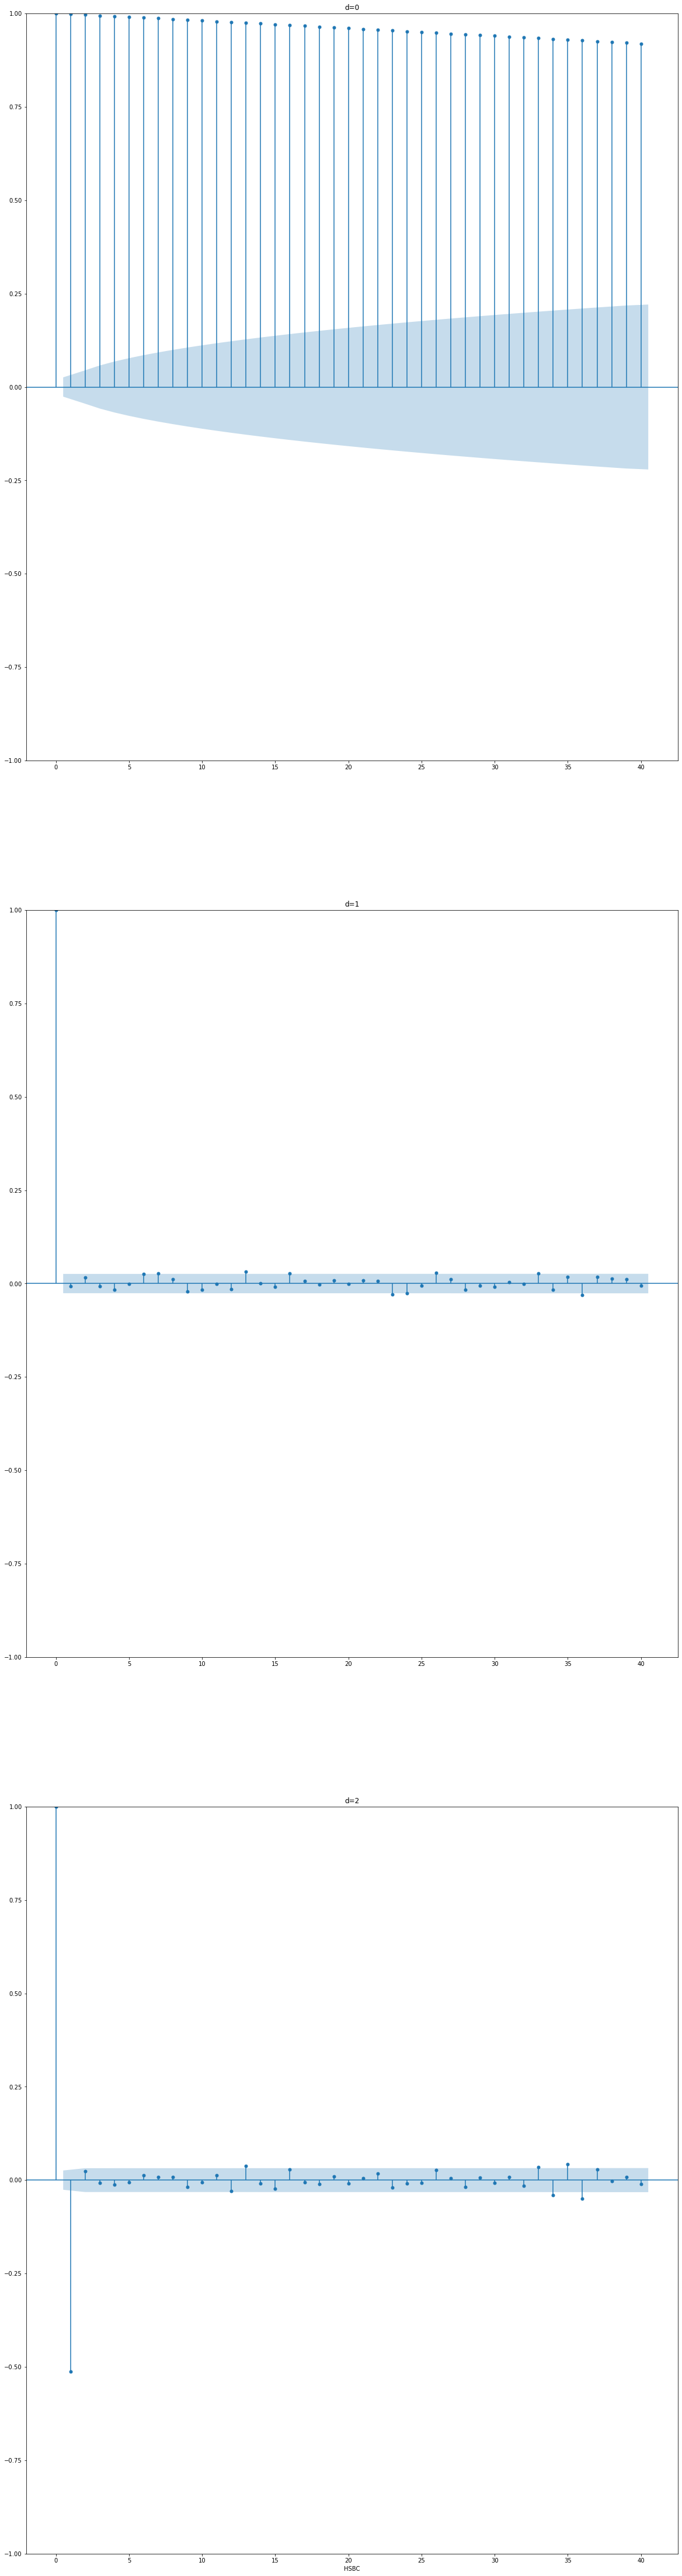

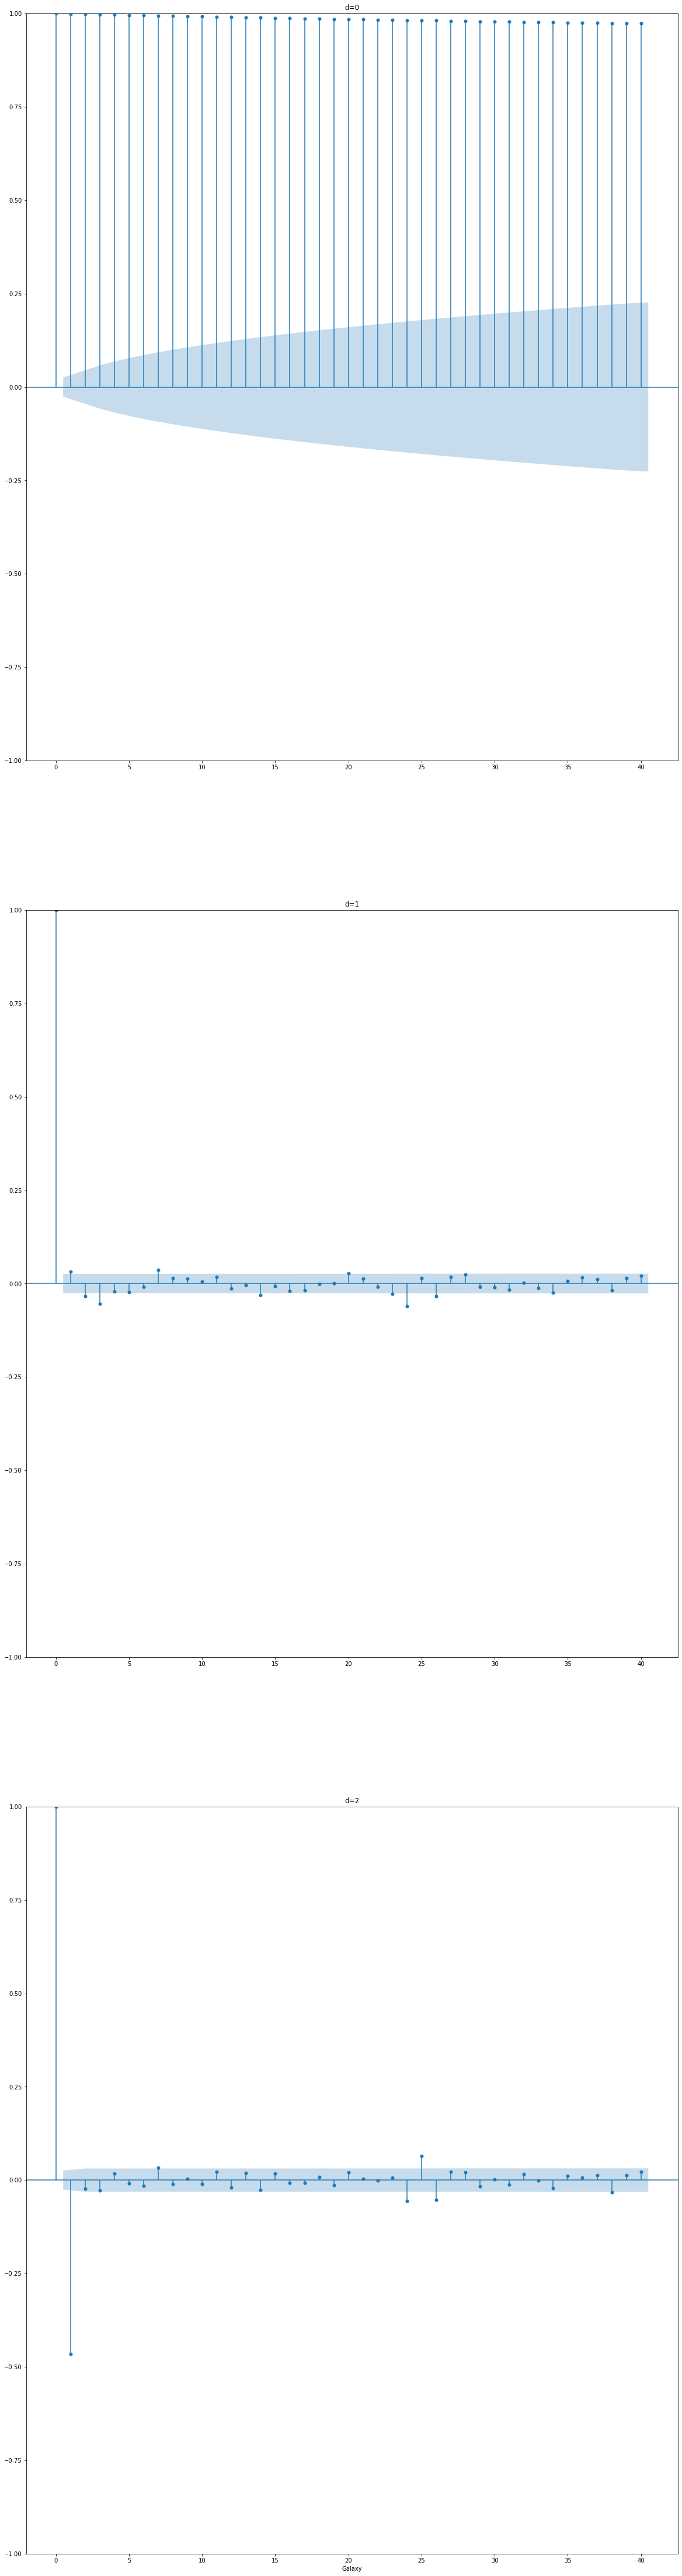

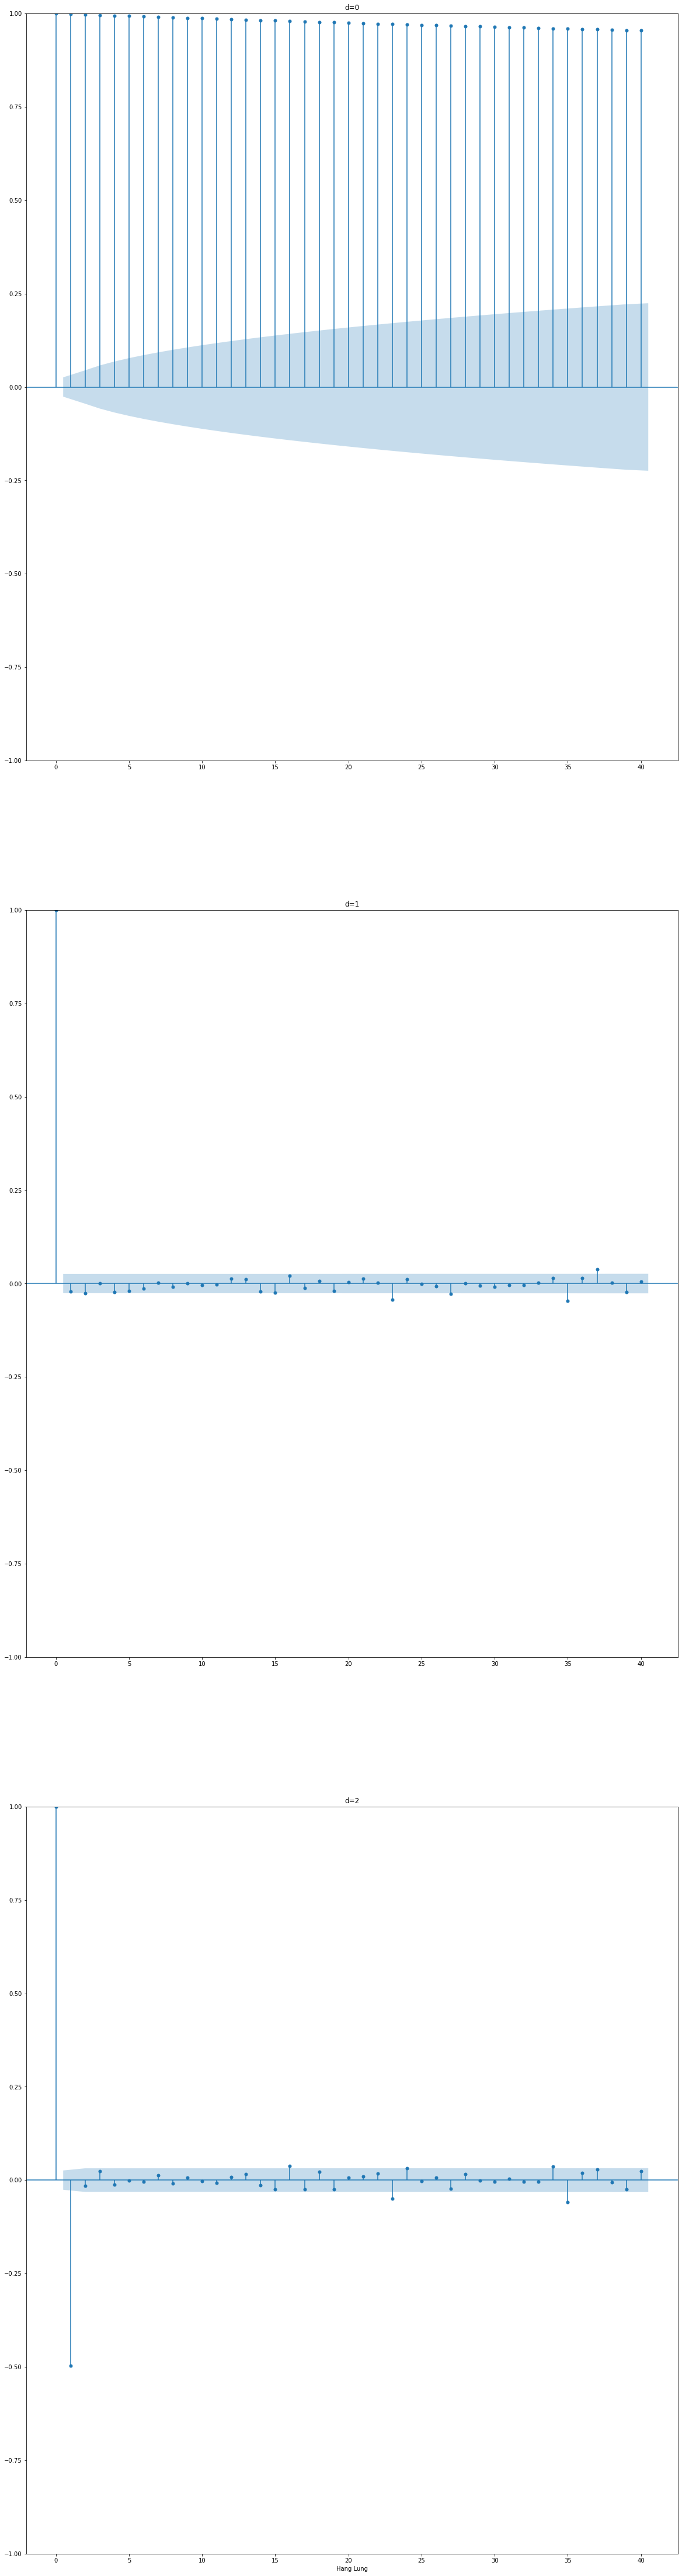

In [3]:
for n,i in enumerate(df):
    fig, axs = plt.subplots(3, figsize=(20,80))
    plot_acf(i['Adj Close'], lags = 40 ,ax=axs[0])
    plot_acf(i['Adj Close'].diff().dropna(), lags = 40 ,ax=axs[1])
    plot_acf(i['Adj Close'].diff().diff().dropna(), lags = 40 ,ax=axs[2])
    axs[0].title.set_text('d=0')
    axs[1].title.set_text('d=1')
    axs[2].title.set_text('d=2')
    plt.xlabel(stk_name[n])
# For all three stock, their parameter 'd' should be 1. 
# Because its autocorrelations are not keeping positive in a high number of lags and lag-1 is close to 0
# q1=0 or 6 or 7,q2=3,q3=0 or 1 or 2

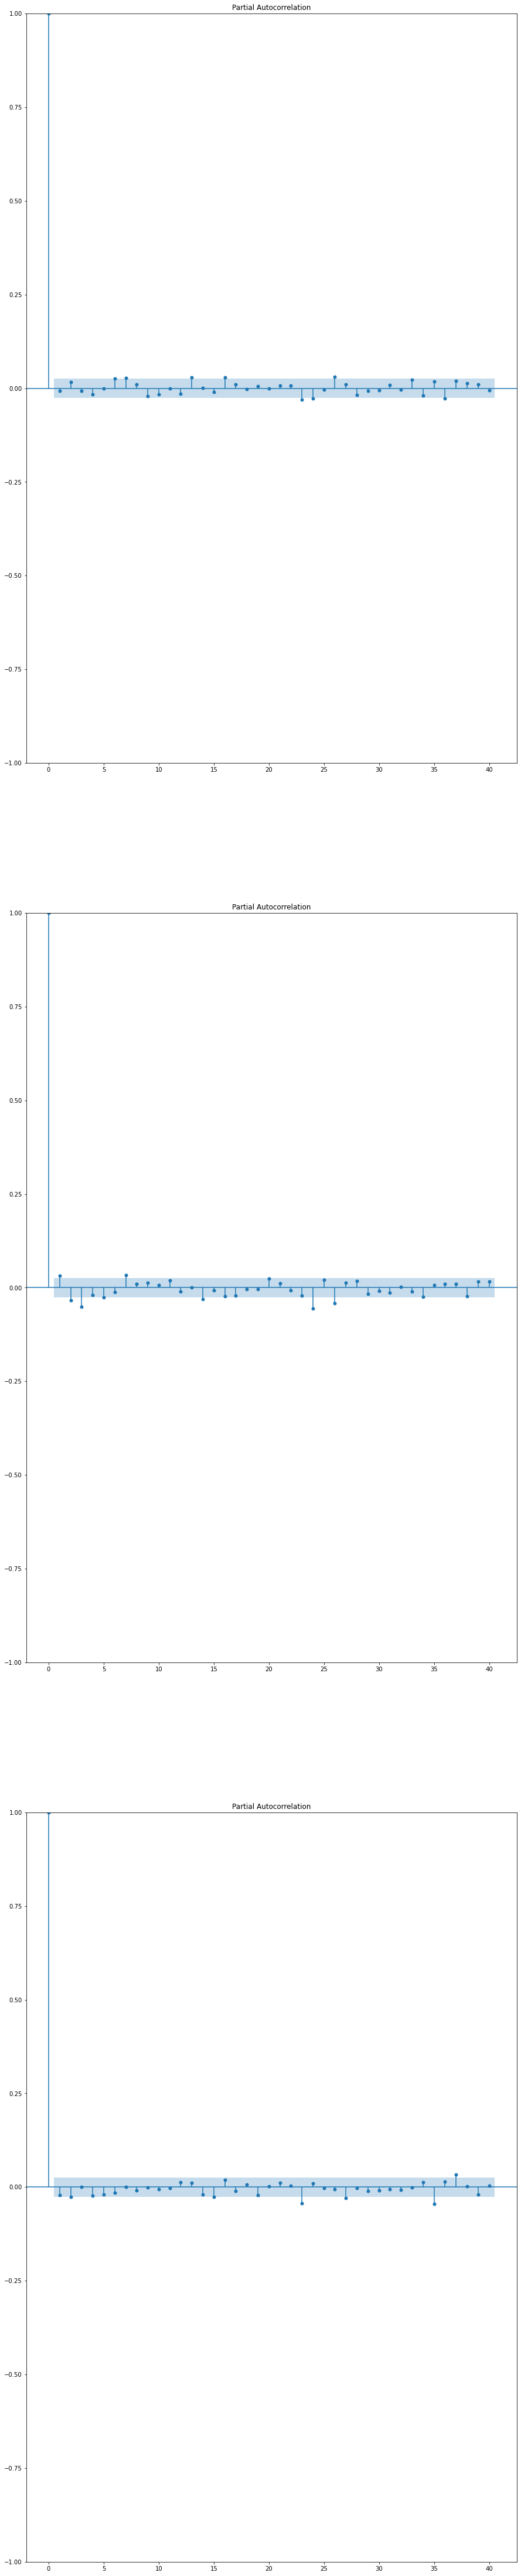

In [4]:
fig2, axs2 = plt.subplots(3, figsize=(15,80))
for n,i in enumerate(df):
    plot_pacf(i['Adj Close'].diff().dropna(),lags = 40 , ax=axs2[n],method='ywm')
# p1=0 or 6 or 7,p2=3,p3=0 or 1 or 2

In [5]:
#HSBC
import warnings
warnings.filterwarnings("ignore")
x=[(0,1,6),(6,1,0),(6,1,6),(0,1,7),(7,1,0),(7,1,7),(6,1,7),(7,1,6),(0,1,0)]
for i in x:
    print('HSBC',i,':')
    model = sm.tsa.arima.ARIMA(df1['Adj Close'], order = i)
    model_fit = model.fit()
    print(model_fit.aic)
#(p,d,q)=(7,1,6)

HSBC (0, 1, 6) :
12846.479881158772
HSBC (6, 1, 0) :
12846.273945634333
HSBC (6, 1, 6) :
12836.471282596613
HSBC (0, 1, 7) :
12844.550906622993
HSBC (7, 1, 0) :
12843.974247414793
HSBC (7, 1, 7) :
12842.949498694896
HSBC (6, 1, 7) :
12836.651481786914
HSBC (7, 1, 6) :
12836.71641876028
HSBC (0, 1, 0) :
12842.028879077247


In [6]:
#Galaxy 
warnings.filterwarnings("ignore")
x=[(0,1,3),(3,1,0),(3,1,3),(2,1,0),(0,1,2),(2,1,2),(0,1,0)]
for i in x:
    print('Galaxy',i,':')
    model = sm.tsa.arima.ARIMA(df2['Adj Close'], order = i)
    model_fit = model.fit()
    print(model_fit.aic)
#(p,d,q)=(3,1,3)

Galaxy (0, 1, 3) :
13530.222241780837
Galaxy (3, 1, 0) :
13530.997856017726
Galaxy (3, 1, 3) :
13516.062756329768
Galaxy (2, 1, 0) :
13544.089592894596
Galaxy (0, 1, 2) :
13545.110507731155
Galaxy (2, 1, 2) :
13517.4681044038
Galaxy (0, 1, 0) :
13552.994748469922


In [7]:
#Hang Lung
warnings.filterwarnings("ignore")
x=[(0,1,2),(2,1,0),(2,1,2),(0,1,1),(1,1,0),(1,1,1),(1,1,2),(2,1,1),(0,1,0)]
for i in x:
    print('Hang Lung',i,':')
    model = sm.tsa.arima.ARIMA(df3['Adj Close'], order = i)
    model_fit = model.fit()
    print(model_fit.aic)
#(p,d,q)=(1,1,1)

Hang Lung (0, 1, 2) :
1860.115760644051
Hang Lung (2, 1, 0) :
1860.317454014477
Hang Lung (2, 1, 2) :
1858.793608735928
Hang Lung (0, 1, 1) :
1862.2040387723223
Hang Lung (1, 1, 0) :
1862.3430659110802
Hang Lung (1, 1, 1) :
1855.5496038236045
Hang Lung (1, 1, 2) :
1857.4003222485885
Hang Lung (2, 1, 1) :
1862.3173612728756
Hang Lung (0, 1, 0) :
1862.853641527234


In [8]:
model = sm.tsa.arima.ARIMA(df1['Adj Close'], order = (7,1,6))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 5750
Model:                 ARIMA(7, 1, 6)   Log Likelihood               -6404.358
Date:                Tue, 07 Mar 2023   AIC                          12836.716
Time:                        21:25:09   BIC                          12929.911
Sample:                             0   HQIC                         12869.150
                               - 5750                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2169      0.215     -1.008      0.313      -0.638       0.205
ar.L2          0.3311      0.212      1.561      0.119      -0.085       0.747
ar.L3         -0.1478      0.116     -1.272      0.203      -0.376       0.080
ar.L4         -0.4977      0.158     -3.157      0.002      -0.807      -0.189
ar.L5          0.1041      0.217      0.480      0.631      -0.321       0.529
ar.L6          0.7667      0.160      4.796      0.000       0.453       1.080
ar.L7          0.0123      0.011      1.085      0.278      -0.010       0.035
ma.L1          0.2080      0.215      0.969      0.333      -0.213       0.629
ma.L2         -0.3207      0.213     -1.505      0.132      -0.738       0.097
ma.L3          0.1565      0.121      1.297      0.195      -0.080       0.393
ma.L4          0.4796      0.162      2.968      0.003       0.163       0.796
ma.L5         -0.0936      0.214     -0.437      0.662      -0.513       0.326
ma.L6         -0.7565      0.162     -4.656      0.000      -1.075      -0.438
sigma2         0.5429      0.004    121.116      0.000       0.534       0.552
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             28163.58
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.36
Prob(H) (two-sided):                  0.02   Kurtosis:                        13.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
model = sm.tsa.arima.ARIMA(df2['Adj Close'], order = (3,1,3))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 5749
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -6751.031
Date:                Tue, 07 Mar 2023   AIC                          13516.063
Time:                        21:25:12   BIC                          13562.659
Sample:                             0   HQIC                         13532.279
                               - 5749                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6082      0.016     38.690      0.000       0.577       0.639
ar.L2          0.5725      0.019     30.242      0.000       0.535       0.610
ar.L3         -0.9285      0.015    -63.995      0.000      -0.957      -0.900
ma.L1         -0.5974      0.016    -37.385      0.000      -0.629      -0.566
ma.L2         -0.5995      0.017    -34.556      0.000      -0.634      -0.566
ma.L3          0.9198      0.015     62.510      0.000       0.891       0.949
sigma2         0.6122      0.005    134.176      0.000       0.603       0.621
===================================================================================
Ljung-Box (L1) (Q):                   1.68   Jarque-Bera (JB):             29271.12
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):              69.95   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
model = sm.tsa.arima.ARIMA(df3['Adj Close'], order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 5749
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -924.775
Date:                Tue, 07 Mar 2023   AIC                           1855.550
Time:                        21:25:13   BIC                           1875.519
Sample:                             0   HQIC                          1862.500
                               - 5749                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9087      0.033     27.570      0.000       0.844       0.973
ma.L1         -0.9272      0.030    -31.312      0.000      -0.985      -0.869
sigma2         0.0808      0.001     96.905      0.000       0.079       0.082
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              5005.88
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               4.11   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""